<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
data=pd.read_csv("DailyDelhiClimateTrain.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [ ]:
fig=px.line(data,x='date',
           y='meantemp',
           title='hsfshama')
fig.show()

In [ ]:
fig=px.line(data,x='date',
            y='humidity',
            title='humidity delhi over the year')
fig.show()

In [ ]:
fig=px.line(data,x='date',
            y='wind_speed')
fig.show()

In [ ]:
fig=px.scatter(data_frame=data,x='humidity',
               y='meantemp',
               size='meantemp',
               trendline='ols')
fig.show()

In [ ]:
data['date'] =pd.to_datetime(data['date'],format='%Y-%m-%d')
data['month'] =data['date'].dt.month
data['year'] =data['date'].dt.year
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  month  year
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667      1  2013
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000      1  2013
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667      1  2013
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667      1  2013
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000      1  2013


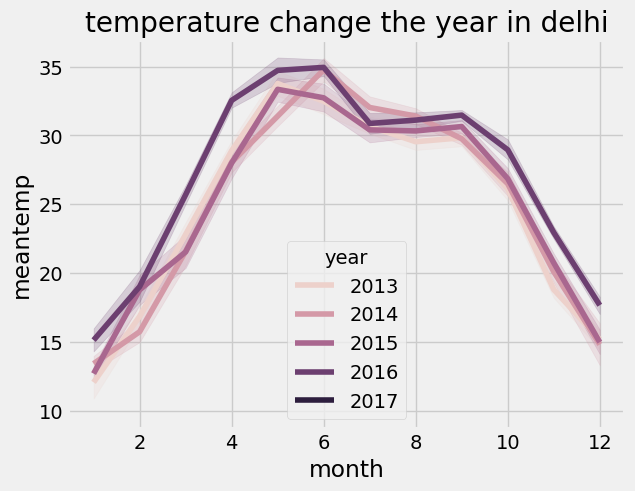

In [ ]:
plt.style.use('fivethirtyeight')
plt.Figure(figsize=(12,15))
plt.title('temperature change the year in delhi')
sns.lineplot(data=data,x='month',y='meantemp',hue='year')
plt.show()

In [ ]:
!pip install prophet

In [ ]:
forecast_data=data.rename(columns={'date':'ds',
                                   'meantemp':'y'})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  month  year
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667      1  2013
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000      1  2013
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667      1  2013
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667      1  2013
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000      1  2013
...         ...        ...         ...         ...           ...    ...   ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217     12  2016
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762     12  2016
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762     12  2016
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000     12  2016
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000      1  2017

[1462 rows x 7 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecats =model.make_future_dataframe(periods=365)
prediction =model.predict(forecats)
plot_plotly(model,prediction)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmputocsd1d/hfcbp_5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmputocsd1d/9l41i40t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75728', 'data', 'file=/tmp/tmputocsd1d/hfcbp_5q.json', 'init=/tmp/tmputocsd1d/9l41i40t.json', 'output', 'file=/tmp/tmputocsd1d/prophet_model5ta7ylf7/prophet_model-20230920141956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
